# This notebook will analyse the IntelliRehabDS dataset

## <span style="color:blue">Load the dataset</span>.

In [27]:
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib
import glob
from mpl_toolkits.mplot3d import Axes3D
matplotlib.use('TkAgg')

#CHANGE this to the project path for your local machine
sys.path.append('/Users/alina/Documents/Work/SourceCode/intellireahabds/')

import dataio.process_skeleton as sk
from configs import config_seamer as cf


In [28]:
#Load the data
print("Path to data is ", cf.path_dataset)
data, data_info, file_names = sk.process_files(cf.path_dataset)


Path to data is  /Users/alina/Desktop/MDPI-Data-Article/Data/SkeletonData/RawData/
Parsing files
Number of ignored files 12


## General data statistics

In [29]:
number_examples = len(data)
print("Total number of considered gestures", len(data))
sk.data_stats(data, data_info)

d = {'correctness': [True]* number_examples, 
     'date': np.zeros([number_examples]), 
     'gesture_type': [""]* number_examples, 
     'patient_id': [""]* number_examples, 
     'position': [""]* number_examples, 
     'repetition_number': np.zeros([number_examples]),
     'length': np.zeros([number_examples])
     }

for i in range(number_examples):
    d['correctness'][i] = (data_info[i].correct == "1")
    d['date'][i] = int(data_info[i].date)
    d['gesture_type'][i] = data_info[i].gesture_type
    d['patient_id'][i] = data_info[i].patient_id
    d['position'][i] = data_info[i].position
    d['repetition_number'][i] = data_info[i].repetition
    d['length'][i] = data[i].shape[0]
            
df = pd.DataFrame(data=d)


Total number of considered gestures 2577
Number correct 2047  with an average length of  68.43185148998535
Number incorrect 530  with an average length of  148.26415094339623


In [30]:
len(df[df['correctness']==False][df['length']>383])



/Users/alina/opt/anaconda3/envs/intellirehabds/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


25

## Draw correct vs incorrect length

Basic information about the length of the sequences
count    2577.000000
mean       84.850601
std        86.911395
min        13.000000
25%        50.000000
50%        64.000000
75%        89.000000
max      1586.000000
Name: length, dtype: float64


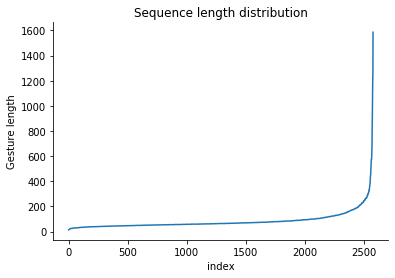

In [31]:
%matplotlib inline
print("Basic information about the length of the sequences")
print(df['length'].describe())
# 
plt.plot(range(df.shape[0]), np.sort(df['length'].values))
plt.xlabel('index')
plt.ylabel('Gesture length')
plt.title("Sequence length distribution")
sns.despine()



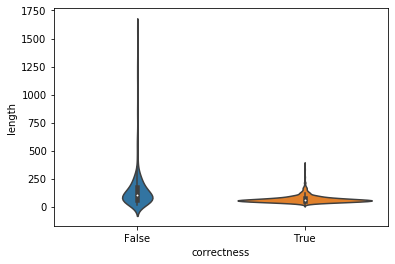

In [32]:
sns.violinplot(x="correctness",y="length",data=df)

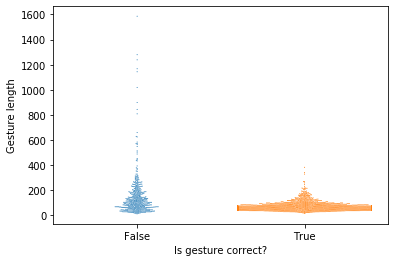

In [33]:
ax_cl = sns.swarmplot(x="correctness",y="length",data=df, size=1)
ax_cl.set(xlabel='Is gesture correct?',ylabel='Gesture length')
plt.savefig(cf.path_output+"Correct_vs_Length.pdf")



2047
530


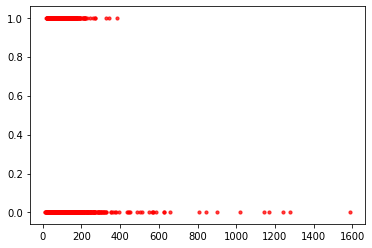

In [34]:
# Define a scatterplot function
def scatterplot(x_data, y_data, x_label="", y_label="", title="", color = "r", yscale_log=False):

    # Create the plot object
    _, ax = plt.subplots()

    # Plot the data, set the size (s), color and transparency (alpha)
    # of the points
    ax.scatter(x_data, y_data, s = 10, color = color, alpha = 0.75)

    if yscale_log == True:
        ax.set_yscale('log')

    # Label the axes and provide a title
    ax.set_title(title)
    ax.set_xlabel(x_label)
    ax.set_ylabel(y_label)
    
#%
print(len(df[df['correctness']==True]))
print(len(df[df['correctness']==False]))
scatterplot(df['length'], df['correctness'])
#sns.distplot(df['length'], color='g', bins=100, hist_kws={'alpha': 0.4});



## Average length correct/incorrect per gesture


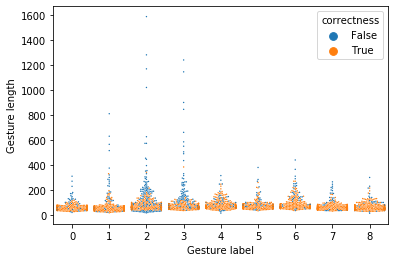

In [35]:
ax = sns.swarmplot(x="gesture_type",y="length",hue="correctness",data=df, size = 1.4)
ax.set(xlabel='Gesture label',ylabel='Gesture length')
plt.savefig(cf.path_output+"Correct_vs_Length_per_gesture.pdf")


In [36]:
print(df.groupby(['gesture_type','correctness'])['length']. mean())


gesture_type  correctness
0             False           95.022222
              True            55.361502
1             False          170.444444
              True            57.824786
2             False          169.972603
              True            74.969432
3             False          186.095238
              True            67.448113
4             False          106.844444
              True            79.621739
5             False          112.342105
              True            71.643836
6             False          154.463415
              True            84.972350
7             False          115.484848
              True            61.222689
8             False           95.531250
              True            63.831373
Name: length, dtype: float64



## Posture analysis

### What is the posture distribution?

In [37]:
import pandas as pd
s = pd.Series(df['position'])
s.value_counts()/len(df)


stand          0.471478
chair          0.326737
wheelchair     0.139309
sit            0.042685
Stand-frame    0.019790
Name: position, dtype: float64

### What is the posture distribution for healthy vs patients?

In [38]:
df['Patient'] = df['patient_id'].str.startswith('2')


In [39]:
print("================Healty================")
s_healty = pd.Series(df[df['Patient']==False]['position'])
print(len(s_healty))
print(s_healty.value_counts())
print(s_healty.value_counts()/len(s_healty))
print("================Patients===============")
s_patient = pd.Series(df[df['Patient']==True]['position'])
print(len(s_patient))
print(s_patient.value_counts())
print(s_patient.value_counts()/len(s_patient))


================Healty================
1406
stand    713
chair    583
sit      110
Name: position, dtype: int64
stand    0.507112
chair    0.414651
sit      0.078236
Name: position, dtype: float64
================Patients===============
1171
stand          502
wheelchair     359
chair          259
Stand-frame     51
Name: position, dtype: int64
stand          0.428693
wheelchair     0.306576
chair          0.221178
Stand-frame    0.043553
Name: position, dtype: float64


## Heat map with number of repetitions per patient


[[ 9. 12. 12.  6. 12. 11. 12. 13.  0.  0.  7.  3. 11. 21.  7.  0.  5.  6.
   6.  7.  6.  6.  9. 12. 12. 12.  6. 12. 12. 11.]
 [13. 12. 12.  7. 12. 12. 12. 16.  0.  0.  6. 17. 12. 15.  6.  6.  5.  6.
   6.  6.  4.  6.  8. 12. 13. 12.  6. 12. 12. 13.]
 [12. 13. 12.  8. 12. 12. 12. 46.  0. 34. 64.  0. 17.  0. 12.  5.  5.  6.
   6.  6. 10.  5.  6. 12. 12. 12.  6.  6. 12. 12.]
 [12. 12. 12.  6. 14. 12. 12. 17.  1.  4. 58.  0. 17. 16.  5.  5.  5.  6.
   7.  5.  7.  6.  7. 12. 12. 12.  6.  6. 12. 11.]
 [12. 13. 13.  6. 12. 12. 12.  7. 36.  0.  7.  0. 14.  0.  0.  5.  5.  6.
   6.  5. 10.  7.  6. 12. 13. 12.  7. 12. 12. 13.]
 [13. 12. 12.  6. 12. 12. 12.  6.  0. 12.  7.  1. 20.  0.  6.  6.  5.  6.
   6.  5.  9.  6.  6. 12. 12. 12.  6. 12. 12. 11.]
 [12. 12. 12.  6. 16. 12. 12.  6.  0.  0.  6.  0. 14. 20.  6.  5.  5.  5.
   6.  4.  9.  6.  6. 12. 12. 11.  6. 12. 13. 12.]
 [12. 12. 12.  6. 13. 12. 12.  0. 23.  0.  7.  0. 25.  9.  6.  0.  7.  5.
   5.  6.  8.  6.  7. 12. 12. 12.  6. 12. 12. 12.]


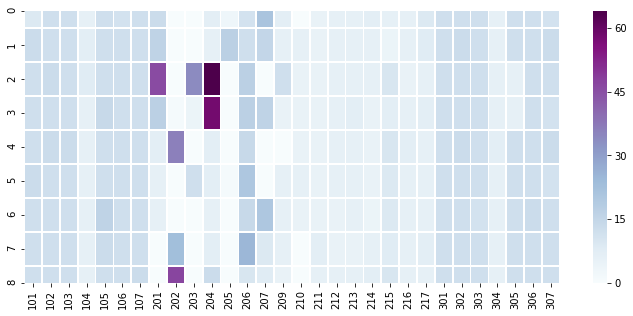

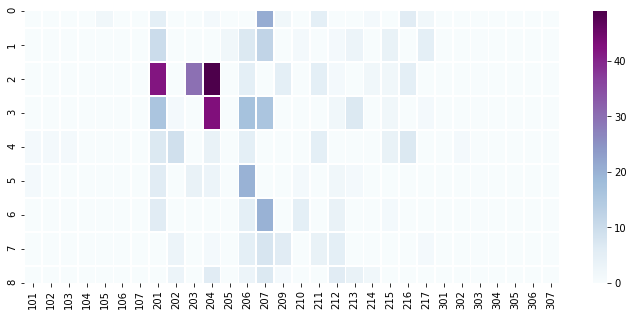

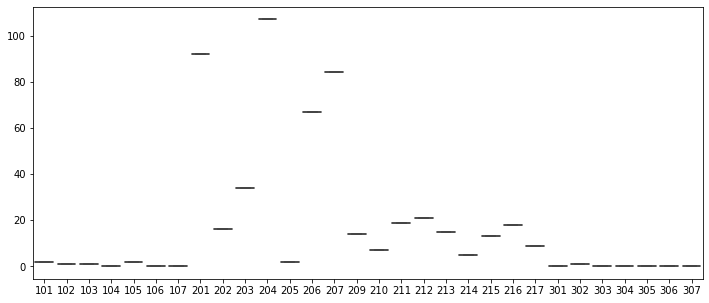

In [40]:
subjects_ids = df['patient_id'].unique()
gestures_ids = df['gesture_type'].unique()

heat_map = np.zeros((len(gestures_ids),len(subjects_ids)))
heat_map_incorrect = np.zeros((len(gestures_ids),len(subjects_ids)))
for idx_s in range(len(subjects_ids)):
    for idx_g in range(len(gestures_ids)):
        heat_map[idx_g][idx_s]= len(df[(df['patient_id']==subjects_ids[idx_s]) & (df['gesture_type']==gestures_ids[idx_g])])
        heat_map_incorrect[idx_g][idx_s]= len(df[(df['patient_id']==subjects_ids[idx_s]) & 
                                       (df['gesture_type']==gestures_ids[idx_g]) &
                                       (df['correctness']==False)])
        
print(heat_map)
print(subjects_ids)

# plt.imshow(heat_map, cmap='hot', interpolation='nearest')
# plt.show()
plt.figure(figsize=(12, 5))
sns.heatmap(heat_map, linewidth=0.7, cmap="BuPu", vmin = 0,  xticklabels=subjects_ids, square=False)
#plt.savefig(cf.path_output+"HeatMapGestures.pdf")
plt.show()

plt.figure(figsize=(12, 5))
sns.heatmap(heat_map_incorrect, linewidth=0.7, cmap="BuPu", vmin = 0,  xticklabels=subjects_ids, square=False)
# plt.savefig(cf.path_output+"HeatMapGesturesIncorrect.pdf")
plt.show()


# count number of repetitions per gesture
sum_incorrect = 0
for idx_g in range(len(gestures_ids)):
    g_correct = len(df[(df['gesture_type']==gestures_ids[idx_g]) & (df['correctness']==True)])
    g_incorrect = len(df[(df['gesture_type']==gestures_ids[idx_g]) & (df['correctness']==False)])
                                        
    sum_incorrect += g_incorrect                           
    print(gestures_ids[idx_g],
          g_correct,
          g_incorrect)
    
print(sum_incorrect, len(df))

# count number of repetitions per gesture where patient
sum_incorrect = 0
for idx_g in range(len(gestures_ids)):
    g_correct = len(df[(df['gesture_type']==gestures_ids[idx_g]) 
                       & (df['correctness']==True)
                       & (df['Patient']==True)])
    g_incorrect = len(df[(df['gesture_type']==gestures_ids[idx_g]) 
                         & (df['correctness']==False)
                        & (df['Patient']==True)])
                                        
    sum_incorrect += g_incorrect                           
    print(gestures_ids[idx_g],
          g_correct,
          g_incorrect)
    
print(sum_incorrect, len(df))

# count number of incorrect repetitions per patient
print("count number of incorrect repetitions per patient")
sum_incorrect = 0
data_inccorect_exec = []
for idx_s in range(len(subjects_ids)):
    g_correct = len(df[(df['patient_id']==subjects_ids[idx_s]) 
                       & (df['correctness']==True)])
    g_incorrect = len(df[(df['patient_id']==subjects_ids[idx_s]) 
                         & (df['correctness']==False)])
                                        
    sum_incorrect += g_incorrect                           
    print(subjects_ids[idx_s],
          g_correct,
          g_incorrect)
    data_inccorect_exec.append(g_incorrect)
    
print(sum_incorrect, len(df))

plt.figure(figsize=(12, 5))
sns.boxplot(subjects_ids, data_inccorect_exec)
plt.show()

    

## Simple Classifiers
### Simple threshold classifier


In [41]:
sk.simple_threshold_classifier(data,data_info, threshold=150)



TP 1987 FP 365 TN 165 FN 60
accuracy 0.8350795498641832


## Gesture visualization
### #D gesture visualisation


In [42]:
def normalize_gesture(gesture):
    norm_x = gesture[0][0]
    norm_y = gesture[0][1]
    norm_z = gesture[0][2]
    for idx_gesture in range(len(gesture)):
        idx_joint = 0
        while idx_joint < len(gesture[0]):
            gesture[idx_gesture][idx_joint] -= norm_x
            gesture[idx_gesture][idx_joint+1] -= norm_y
            gesture[idx_gesture][idx_joint+2] -= norm_z
            idx_joint += 3
        idx_gesture += 1
    return gesture




In [43]:
def set_ax_limit_skeleton(ax1):
    ax1.clear()
    ax1.set_xlabel('X')
    ax1.set_xlim(-0.5, 0.5)
    ax1.set_ylabel('Y')
    ax1.set_ylim(-1, 1)
    ax1.set_zlabel('Z')
    ax1.set_zlim(0, 2)

def draw_beautiful_skeleton(gesture_data, output_image):

    matplotlib.rcParams.update({'font.size': 6})
    fig = plt.figure(dpi=200, figsize=(6, 7))#figsize=(50, 50))
    ax1 = fig.gca(projection='3d')
    idx = 0

    ax1.view_init(elev=90., azim=-90)
    ax1.set_facecolor('white')

    joint_names = ["SpineBase", "SpineMid", "Neck", "Head", "ShoulderLeft", "ElbowLeft",
                   "WristLeft", "HandLeft", "ShoulderRight", "ElbowRight", "WristRight",
                   "HandRight", "HipLeft", "KneeLeft", "AnkleLeft", "FootLeft",
                   "HipRight",  "KneeRight", "AnkleRight", "FootRight", "SpineShoulder",
                   "HandTipLeft", "ThumbLeft", "HandTipRight", "ThumbRight"]

    # (10, 11) (wristRight, HandRight)
    # (11, 23) (handright, handtipright), (handRight, thumbright)
    # connectivity = [(0, 1), (1, 20), (20, 2), (2, 3), (20, 8), (8, 9), (9, 10), (10, 11), (11, 24), (11, 23),
    #                 (20, 4), (4, 5), (5, 6), (6, 7), (7, 22), (7, 21), (0, 16), (16, 17), (17, 18), (18, 19), (0, 12),
    #                 (12, 13), (13, 14), (14, 15)]

    # Ignore hand joints
    connectivity = [(0, 1), (1, 20), (20, 2), (2, 3), (20, 8), (8, 9), (9, 10), (10, 11), 
                    (20, 4), (4, 5), (5, 6), (6, 7), (0, 16), (16, 17), (17, 18), (18, 19), (0, 12),
                    (12, 13), (13, 14), (14, 15)]

    set_ax_limit_skeleton(ax1)

    fig.tight_layout()
    # for skeleton in [gesture_data[0], gesture_data[10], gesture_data[20]]:
    idx_frame = 0
    downsample = 1 #2
    colors_palette = sns.color_palette("PiYG", int(len(gesture_data)/downsample))
    print(colors_palette)
    for skeleton in gesture_data:
        idx_frame += 1
        # fig.subplots_adjust(left=-0.2, bottom=-0.1)
        if idx_frame % downsample != 0:
            continue

        # plot_joints(ax1, skeleton)
        idx_joint = 0
        joints_size = len(skeleton) - 3*4 # ignore last 4 joints corresponding to hands tip
        while idx_joint < joints_size:
            ax1.scatter(skeleton[idx_joint], skeleton[idx_joint+1], skeleton[idx_joint+2], s=1.5, c=colors_palette[idx])#c=np.random.rand(3,))#c=="red")
            idx_joint += 3
        for connection in connectivity:
            # plot_joint_connections(ax1, connection, joint_names, skeleton)
            joint_info1 = [0]*3
            joint_info1[0] = skeleton[connection[0]*3]
            joint_info1[1] = skeleton[connection[0]*3+1]
            joint_info1[2] = skeleton[connection[0]*3+2]
            joint_info2 = skeleton[connection[1]*3:(connection[1]*3+3)]
            ax1.plot([joint_info1[0], joint_info2[0]],
                     [joint_info1[1], joint_info2[1]],
                     [joint_info1[2], joint_info2[2]], linewidth=1.0, solid_capstyle='round', 
                     c=colors_palette[idx])
        # out_image = output_folder + str(idx) + ".png"
        # fig.savefig(out_image, bbox_inches='tight', dpi=300)
        # files_images.append(out_image)
        idx += 1
        
    plt.gca().set_axis_off()
    plt.subplots_adjust(top = 1, bottom = 0, right = 1, left = 0, 
            hspace = 0, wspace = 0)
    plt.margins(0,0)
    plt.gca().xaxis.set_major_locator(plt.NullLocator())
    plt.gca().yaxis.set_major_locator(plt.NullLocator())
    plt.gca().zaxis.set_major_locator(plt.NullLocator())
    fig.savefig(output_image, bbox_inches='tight', dpi=300)
    plt.show()
    
    #toMovie(output_folder, files_images, "skeleton.gif")



'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

processing gesture: 995 204_18_2_10_2_chair.txt
204 18 2 10 2 chair
/Users/alina/Desktop/MDPI-Data-Article/Data/SkeletonData/EDA/204_18_2_10_2_chair.txt.pdf
[(0.6245290272971934, 0.03590926566705113, 0.3744713571703191), (0.6921953094963476, 0.06789696270665128, 0.42737408688965783), (0.7598615916955018, 0.09988465974625144, 0.4802768166089965), (0.8013840830449827, 0.21199538638984994, 0.546712802768166), (0.8321414840445982, 0.3251826220684351, 0.6069973087274125), (0.8628988850442137, 0.4383698577470203, 0.6672818146866589), (0.8881199538638985, 0.5247981545559399, 0.722952710495963), (0.9144175317185697, 0.6119953863898498, 0.7838523644752017), (0.9377931564782774, 0.689504036908881, 0.8379853902345249), (0.9552479815455593, 0.7492502883506342, 0.8726643598615916), (0.9700115340253748, 0.8009227220299884, 0.8985005767012687), (0.9866205305651673, 0.8590542099192618, 0.9275663206459054), (0.9875432525951557, 0.8961168781237985, 0.9434063821607074), (0.980161476355248, 0.924413687043

TypeError: Must pass a single positional argument for all margins, or one for each margin (x, y, z).

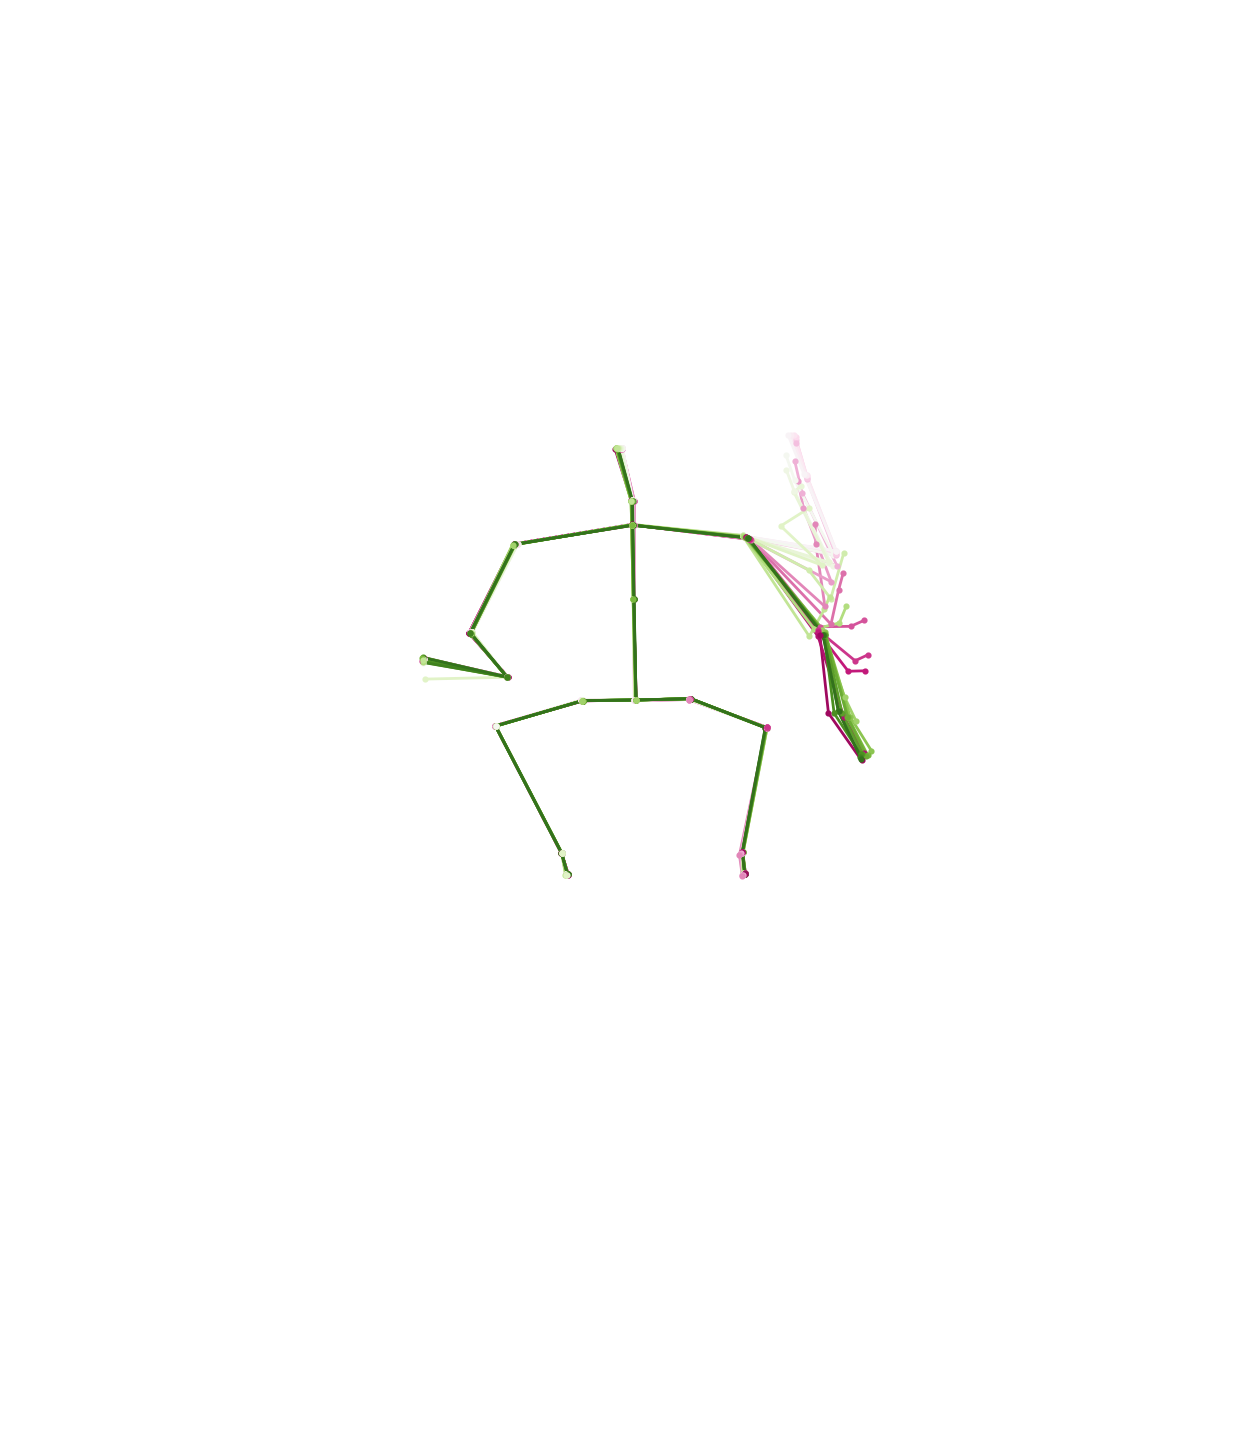

In [44]:
# Select gesture
# correct gesture index: 25, 131, 241, 416, 2389, 2127, 1841, 2503
# incorrect 1207, 1506, 1786, 1664, 757, 995
index_gesture = 995
gesture = data[index_gesture]
print("processing gesture:", index_gesture, file_names[index_gesture])
data_info[index_gesture].print()
# Normalize gesture
gesture = normalize_gesture(gesture)
# Draw skeleton 
print(cf.path_output+file_names[index_gesture]+".pdf")
draw_beautiful_skeleton(gesture,cf.path_output+file_names[index_gesture]+".pdf")

### Check how many times each subject repeated each gesture

### Check how many times each subject repeated each gesture

In [ ]:
subj_correct_stats = {}
subj_incorrect_stats = {}

# remember filenames look like:
# patientid_date_label_repetitionNumber_correction_position.txt
gestures = ['0','1','2','3','4','5','6','7','8']
labels = ['1','2']
subjects = ['104', '209', '205', '213', '303', '204', '201', '210', '211', '206', '103', '203', '305', '202', '217', '105',
 '107',  '304', '302', '212', '102', '306', '208', '214', '307', '106', '216', '215', '218', '207', '301', '101']

subjects = ['101','102','103','104','105','106','107','301','302','303','304','305','306','307',
            '201','202','203','204','205','206','207','209','210','211','212','213','214','215','216']
m = []
for gesture in gestures:
    #print('Gestures: ',gesture)
    for subj in subjects:
        #print('Subj: ',subj)
        for label in labels:
            count = 0
            #print('Label: ',label)
            file_list = glob.glob(cf.path_dataset_simplified+subj+'_*_'+gesture+'_*_'+label+'_*.txt')
            #print('Count: ',len(file_list))
            if label == '1':
                subj_correct_stats[subj] = len(file_list)
            else:
                subj_incorrect_stats[subj] = len(file_list)

    # Now plot
    X = np.arange(len(subj_correct_stats))

    fig = plt.figure(figsize=(15,8))
    ax = fig.add_subplot(1,1,1)


    ax.bar(X, subj_correct_stats.values(), width=0.2, color='b', align='center')
    ax.bar(X-0.2, subj_incorrect_stats.values(), width=0.2, color='g', align='center')
    ax.legend(('Num Correct','Num Incorrect'), fontsize=20)

    plt.xticks(X, subj_correct_stats.keys(), fontsize=15)
    plt.xlabel('Subject ID', fontsize=23)
    ax.tick_params(axis='x', rotation=45)
    plt.ylabel('Number of Repetitions', fontsize=23)
  #  plt.title("Counts per Subject for Gesture: "+gesture, fontsize=17)
    print(cf.path_output+"CountsPerSubject_"+gesture+".pdf")
    plt.savefig(cf.path_output+"CountsPerSubject_"+gesture+".pdf")
   # plt.show()
    #print(m)

### Check and plot the number of correct and incorrect episodes for each gesture

In [ ]:
correct_stats = {}
incorrect_stats = {}
# patientid_date_label_repetitionNumber_correction_position.txt
gestures = ['0','1','2','3','4','5','6','7','8']
labels = ['1','2']
subjects = ['104', '209', '205', '213', '303', '204', '201', '210', '211', '206', '103', '203', '305', '202', '217', '105',
 '107',  '304', '302', '212', '102', '306', '208', '214', '307', '106', '216', '215', '218', '207', '301', '101']
m = []
for gesture in gestures:
    #print('Gesture: ',gesture)
    for label in labels:
        count = 0
        #print('Label: ',label)
        for subj in subjects:
            #print('Subj: ',subj)
            for file_name in glob.glob(cf.path_dataset_simplified+subj+'_*_'+gesture+'_*_'+label+'_*.txt'):
                tmp_df = pd.read_csv(file_name,header=None)
                m.append(tmp_df.shape[0])
                count += 1
        #print('Count: ',count)
        if label == '1':
            correct_stats[gesture] = count
        else:
            incorrect_stats[gesture] = count
#print(m)

In [ ]:
X = np.arange(len(correct_stats))

# original data is at top left
fig = plt.figure(figsize=(15,8))
ax = fig.add_subplot(1,1,1)


ax.bar(X, correct_stats.values(), width=0.2, color='b', align='center')
ax.bar(X-0.2, incorrect_stats.values(), width=0.2, color='g', align='center')
ax.legend(('Correct','Incorrect'),fontsize=16)

plt.xticks(X, correct_stats.keys(),fontsize=13)
plt.xlabel('Gesture', fontsize=17)
#ax.tick_params(axis='x', rotation=45)
plt.ylabel('How Many Repetitions', fontsize=17)
plt.savefig(cf.path_output+"NumberOfRepetitions.pdf")
#plt.title("Move Counts", fontsize=17)
plt.show()





In [ ]:
### Plot variations of repetitions variation for a particular gesture

In [ ]:
fig = plt.figure(figsize=(15,8))
plt.xlabel('Number of Frames',fontsize=16)
plt.ylabel('Normalised Position Value', fontsize=16)

file_list = glob.glob(cf.path_dataset_simplified+'103_18_5_*_1_stand.txt')

print(len(file_list))
for f in file_list:
    print(f)

for file in file_list:
    df = pd.read_csv(file)
    print(df.shape)
    #mean_gesture = df.values.mean(axis=1)
    mean_gesture = df.values[:,30] - df.values[:,0]

    plt.plot(mean_gesture)

plt.savefig(cf.path_output+"mean-gesture.pdf")

In [ ]:
from scipy.interpolate import interp1d
subjects = ['101', '102', '103', '104', '105']
fig = plt.figure(figsize=(15,8))
plt.xlabel('Number of Frames',fontsize=16)
plt.ylabel('Normalised Position Value', fontsize=16)
for subj in subjects:
    file_list = glob.glob(cf.path_dataset_simplified+subj+'_18_5_*_1_stand.txt')
    #b = np.zeros((33,len(file_list)))
    #print(len(file_list))
    a = np.zeros(shape=(100,len(file_list)))

    #plt.title("X axis - Gesture 5 - Subject 103 - 12 reps - correct")
    i = 0
    for file in file_list:
        df = pd.read_csv(file)
        #print(df.shape)
        #mean_gesture = df.values.mean(axis=1)
        mean_gesture = df.values[:,30] - df.values[:,0]

        x = np.linspace(0, 100, num = df.shape[0])
        y = mean_gesture
        f = interp1d(x, y,kind='cubic')
        x_new = np.linspace(0, 100, num = 100)

        a[:,i] = f(x_new)
        i+=1
        #b[:,:-1] = mean_gesture
    plt.plot(a[:,:].mean(axis=1))

plt.savefig(cf.path_output+"mean-gesture-subjects.pdf")